In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
Q = np.array([[1/np.sqrt(5), 2/np.sqrt(5)],
              [-2/np.sqrt(5),1/np.sqrt(5)]])
Q_inv = np.linalg.inv(Q)
lambda_mat = np.array([[100.0, 0],
                       [0.0,  20.0]])
D = Q@lambda_mat@Q_inv
D

array([[ 36., -32.],
       [-32.,  84.]])

In [5]:
xy = [2,3]
x,y = xy
print(x, y, xy)

2 3 [2, 3]


In [44]:
qolo = plt.imread("Qolo_T_CB_top_bumper.png")

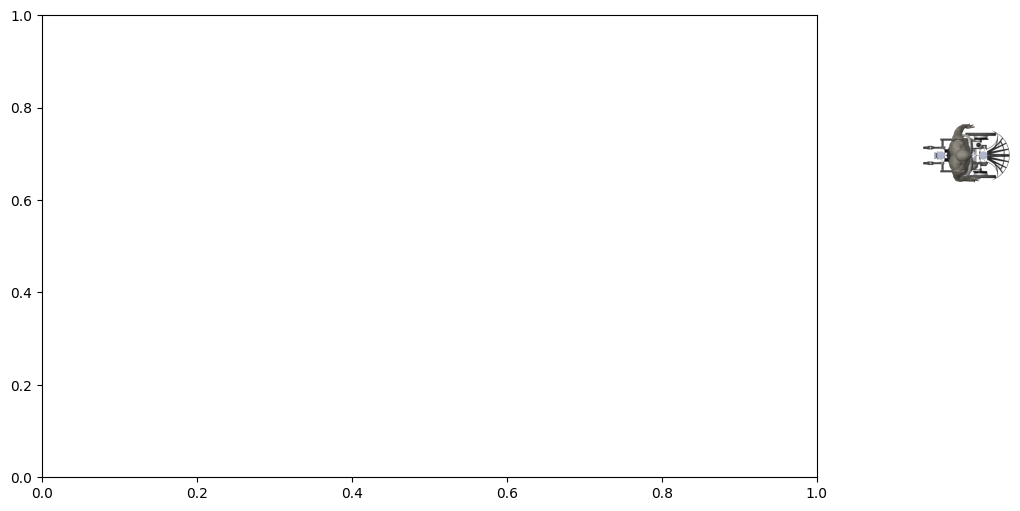

In [41]:

#qolo = mpimg.imread("Qolo_T_CB_top_bumper.png")

height = 6
width = 10
x = 10
fig, ax = plt.subplots(figsize = (width, height))
newax = fig.add_axes([x/width,0.6,0.1,0.1])
newax.imshow(qolo)
plt.axis('off')
# newax.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     left = False,
#     right = False,
#     labelbottom=False) # labels along the bottom edge are off


plt.show()

In [19]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

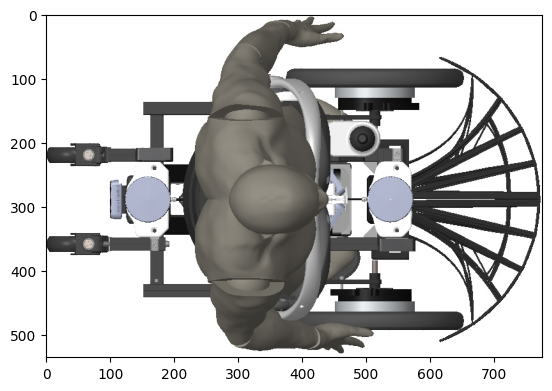

In [24]:
tr = Affine2D().rotate_deg(30)

grid_helper = floating_axes.GridHelperCurveLinear(
    tr, extremes=(-0.5, 3.5, 0, 4),
    # grid_locator1=MaxNLocator(nbins=4),
    # grid_locator2=MaxNLocator(nbins=4),
)

ax1 = fig.add_subplot(
    131, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper
)
aux_ax = ax1.get_aux_axes(tr)
aux_ax.bar([0, 1, 2, 3], [3, 2, 1, 3])
ax1 = plt.imshow(qolo)

plt.show()

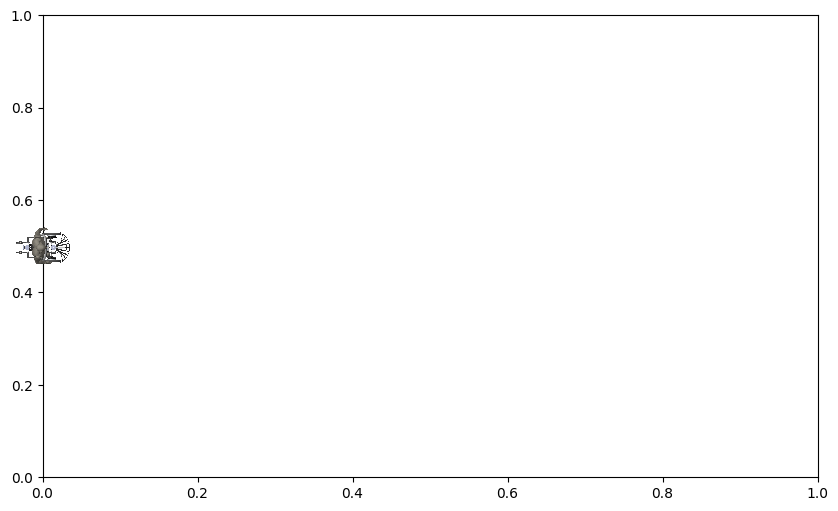

In [50]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent

fig, ax = plt.subplots(figsize =(10,6))
imagebox = OffsetImage(qolo, zoom = 0.05)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (0, 0.5), frameon = False)
ax.add_artist(ab)